<a href="https://colab.research.google.com/github/Youness-JABAR/TensorFlow__Projects/blob/main/FSIV_traffic_sign_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Sign Classifier using CNNs and Keras Tuner



create a folder on your drive called "Datasets" and then upload on this folder:
	
  - <a href="https://drive.google.com/file/d/1O7x20-yteqN0sZkS66iGR19u5NKMMNYO/view?usp=sharing">"fsiv_gtscb_moodle.zip"</a> which contains our simplified dataset.
	
  - "data" folder which contains pictures from the internet to test the model.

run all blocks and check the results 

you will find explanations for each block 

In [ ]:
# Connect to GDrive
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/MyDrive/Colab Notebooks/FSIV_traffic/'
pathInstall = '/content/gdrive/MyDrive/Colab Notebooks/'

Mounted at /content/gdrive


In [ ]:
# Get dataset and copy to local machine
!mkdir /content/local
!cp /content/gdrive/MyDrive/Datasets/fsiv_gtscb_moodle.zip /content/local

In [ ]:
# Unzip dataset
%cd /content/local/
!unzip /content/local/fsiv_gtscb_moodle.zip

train_dir = '/content/local/fsiv_gtscb/train'

/content/local
Archive:  /content/local/fsiv_gtscb_moodle.zip
   creating: fsiv_gtscb/
  inflating: fsiv_gtscb/generate_train_dt.sh  
   creating: fsiv_gtscb/train/
  inflating: fsiv_gtscb/train/00013_00030_00017.ppm  
  inflating: fsiv_gtscb/train/00001_00073_00023.ppm  
  inflating: fsiv_gtscb/train/00013_00064_00021.ppm  
  inflating: fsiv_gtscb/train/00012_00020_00023.ppm  
  inflating: fsiv_gtscb/train/00013_00038_00017.ppm  
  inflating: fsiv_gtscb/train/00033_00007_00019.ppm  
  inflating: fsiv_gtscb/train/00001_00058_00025.ppm  
  inflating: fsiv_gtscb/train/00013_00029_00025.ppm  
  inflating: fsiv_gtscb/train/00001_00010_00017.ppm  
  inflating: fsiv_gtscb/train/00011_00032_00017.ppm  
  inflating: fsiv_gtscb/train/00014_00015_00024.ppm  
  inflating: fsiv_gtscb/train/00012_00005_00024.ppm  
  inflating: fsiv_gtscb/train/00014_00020_00020.ppm  
  inflating: fsiv_gtscb/train/00012_00056_00017.ppm  
  inflating: fsiv_gtscb/train/00001_00046_00018.ppm  
  inflating: fsiv_gtscb/t

Images are in ppm format, not supported by Keras. Then, we need to convert them.
Let's use the command 'mogrify'.

In [ ]:
# Install mogrify in the remote machine
!apt-get update
!apt-get install -y axel imagemagick > /dev/null

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:14 http://ppa

In [ ]:
# Convert images to png
#!convert /content/local/fsiv_gtscb/train/00001_00000_00015.ppm /content/local/fsiv_gtscb/train/00001_00000_00015.png
%cd /content/local/fsiv_gtscb/train/

!mogrify -format png *.ppm

/content/local/fsiv_gtscb/train


Keras needs the images grouped per class into directories.

In [ ]:
!mkdir 00
!mv 00001_*.png 00

!mkdir 01
!mv 00011_*.png 01

!mkdir 02
!mv 00012_*.png 02

!mkdir 03
!mv 00013_*.png 03

!mkdir 04
!mv 00014_*.png 04

!mkdir 05
!mv 00032_*.png 05

!mkdir 06
!mv 00033_*.png 06

In [ ]:
# Let's check one of the new directories
!ls /content/local/fsiv_gtscb/train/00/

00001_00000_00015.png  00001_00024_00023.png  00001_00049_00020.png
00001_00000_00016.png  00001_00024_00024.png  00001_00049_00021.png
00001_00000_00017.png  00001_00024_00025.png  00001_00049_00022.png
00001_00000_00018.png  00001_00025_00015.png  00001_00049_00023.png
00001_00000_00019.png  00001_00025_00016.png  00001_00049_00024.png
00001_00000_00020.png  00001_00025_00017.png  00001_00049_00025.png
00001_00000_00021.png  00001_00025_00018.png  00001_00050_00015.png
00001_00000_00022.png  00001_00025_00019.png  00001_00050_00016.png
00001_00000_00023.png  00001_00025_00020.png  00001_00050_00017.png
00001_00000_00024.png  00001_00025_00021.png  00001_00050_00018.png
00001_00000_00025.png  00001_00025_00022.png  00001_00050_00019.png
00001_00001_00015.png  00001_00025_00023.png  00001_00050_00020.png
00001_00001_00016.png  00001_00025_00024.png  00001_00050_00021.png
00001_00001_00017.png  00001_00025_00025.png  00001_00050_00022.png
00001_00001_00018.png  00001_00026_00015.png  00

In [ ]:
import tensorflow as tf

batch_size = 32
#180 180
img_height = 28
img_width = 28
train_dir = '/content/local/fsiv_gtscb/train/'

class_names = ['prohibition', 'warning', 'diamond', 'giveway', 'stop', 'endprohibition', 'obligation']

# Prepare dataset for Keras
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  #20% of the dataset for validation 
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(train_ds.class_names)

Found 3487 files belonging to 7 classes.
Using 2790 files for training.
Found 3487 files belonging to 7 classes.
Using 697 files for validation.
['00', '01', '02', '03', '04', '05', '06']


In [ ]:
train_ds

<BatchDataset shapes: ((None, 28, 28, 3), (None,)), types: (tf.float32, tf.int32)>

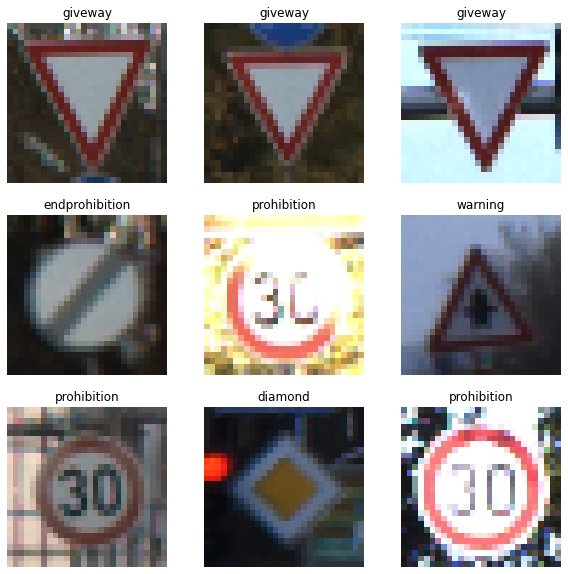

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


#Model creation

In [ ]:
!ls


00		       00011_00031_00025.ppm  00013_00023_00025.ppm
00001_00000_00015.ppm  00011_00032_00015.ppm  00013_00024_00015.ppm
00001_00000_00016.ppm  00011_00032_00016.ppm  00013_00024_00016.ppm
00001_00000_00017.ppm  00011_00032_00017.ppm  00013_00024_00017.ppm
00001_00000_00018.ppm  00011_00032_00018.ppm  00013_00024_00018.ppm
00001_00000_00019.ppm  00011_00032_00019.ppm  00013_00024_00019.ppm
00001_00000_00020.ppm  00011_00032_00020.ppm  00013_00024_00020.ppm
00001_00000_00021.ppm  00011_00032_00021.ppm  00013_00024_00021.ppm
00001_00000_00022.ppm  00011_00032_00022.ppm  00013_00024_00022.ppm
00001_00000_00023.ppm  00011_00032_00023.ppm  00013_00024_00023.ppm
00001_00000_00024.ppm  00011_00032_00024.ppm  00013_00024_00024.ppm
00001_00000_00025.ppm  00011_00032_00025.ppm  00013_00024_00025.ppm
00001_00001_00015.ppm  00011_00033_00015.ppm  00013_00025_00015.ppm
00001_00001_00016.ppm  00011_00033_00016.ppm  00013_00025_00016.ppm
00001_00001_00017.ppm  00011_00033_00017.ppm  00013_00025_00

#hyperparameter tuning

Install and import the Keras Tuner.


In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 6.8 MB/s 


In [ ]:
import keras_tuner as kt

Define the model

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28,3)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(tf.keras.layers.Dense(7))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

Instantiate the tuner to perform the hypertuning.

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


Create a callback to stop training early after reaching a certain value for the validation loss.

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


Run the hyperparameter search.

In [ ]:
tuner.search(train_ds, epochs=50, validation_data=val_ds, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 288 and the optimal learning rate for the optimizer
is 0.001.



Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2352)              0         
                                                                 
 dense_8 (Dense)             (None, 288)               677664    
                                                                 
 dense_9 (Dense)             (None, 7)                 2023      
                                                                 
Total params: 679,687
Trainable params: 679,687
Non-trainable params: 0
_________________________________________________________________


Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.

In [ ]:

# TODO Train the model
batch_size = 128
epochs = 50

history= model.fit(
  train_ds,
  validation_data=val_ds ,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/50
88/88 [==============================] - 2s 25ms/step - loss: 0.1155 - accuracy: 0.9953 - val_loss: 0.5065 - val_accuracy: 0.9842
Epoch 2/50
88/88 [==============================] - 2s 24ms/step - loss: 0.0518 - accuracy: 0.9946 - val_loss: 0.3013 - val_accuracy: 0.9914
Epoch 3/50
88/88 [==============================] - 2s 21ms/step - loss: 0.3288 - accuracy: 0.9907 - val_loss: 0.4129 - val_accuracy: 0.9871
Epoch 4/50
88/88 [==============================] - 2s 21ms/step - loss: 0.1028 - accuracy: 0.9957 - val_loss: 2.0171 - val_accuracy: 0.9598
Epoch 5/50
88/88 [==============================] - 2s 24ms/step - loss: 1.1905 - accuracy: 0.9746 - val_loss: 0.6490 - val_accuracy: 0.9828
Epoch 6/50
88/88 [==============================] - 2s 21ms/step - loss: 2.9338 - accuracy: 0.9409 - val_loss: 0.7445 - val_accuracy: 0.9785
Epoch 7/50
88/88 [==============================] - 2s 21ms/step - loss: 1.0222 - accuracy: 0.9710 - val_loss: 0.2644 - val_accuracy: 0.9943
Epoch 8/50
88

Best epoch: 10


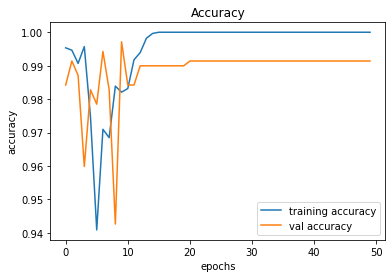

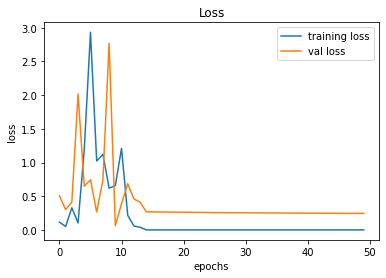

In [ ]:

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
batch_size = 128
history= hypermodel.fit(
  train_ds,
  validation_data=val_ds ,
  batch_size=batch_size,
  epochs=best_epoch
)


Epoch 1/10
88/88 [==============================] - 3s 26ms/step - loss: 84.8715 - accuracy: 0.7054 - val_loss: 1.4846 - val_accuracy: 0.9455
Epoch 2/10
88/88 [==============================] - 2s 26ms/step - loss: 3.0106 - accuracy: 0.9280 - val_loss: 0.8315 - val_accuracy: 0.9641
Epoch 3/10
88/88 [==============================] - 2s 24ms/step - loss: 3.8432 - accuracy: 0.9287 - val_loss: 0.9671 - val_accuracy: 0.9656
Epoch 4/10
88/88 [==============================] - 2s 21ms/step - loss: 1.3878 - accuracy: 0.9595 - val_loss: 4.7265 - val_accuracy: 0.8996
Epoch 5/10
88/88 [==============================] - 2s 25ms/step - loss: 3.4437 - accuracy: 0.9409 - val_loss: 2.4942 - val_accuracy: 0.9383
Epoch 6/10
88/88 [==============================] - 2s 24ms/step - loss: 2.2289 - accuracy: 0.9563 - val_loss: 5.4337 - val_accuracy: 0.8780
Epoch 7/10
88/88 [==============================] - 2s 21ms/step - loss: 3.6801 - accuracy: 0.9337 - val_loss: 1.3105 - val_accuracy: 0.9785
Epoch 8/10
8

In [ ]:
# Save model on your Drive, so we can use it later
model_path = '/content/gdrive/MyDrive/Colab Notebooks/traffic_classif_HYPER.h5'
hypermodel.save(model_path)

#end of hyperplane tuning

#THE PREVIOUS CODE

In [ ]:
# num_classes = 7
# input_shape = (img_height,img_width,3)
# model = tf.keras.Sequential([
#   # TODO add your layers
#   tf.keras.Input(shape=input_shape),
#         tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dropout(0.5),
#   tf.keras.layers.Dense(num_classes, activation="softmax")

# ], name="Traffic_signm")


In [ ]:
# model.summary()

In [ ]:
# TODO Compile your model
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# TODO Train the model
# batch_size = 128
# epochs = 15
# # batch_size = 155
# # epochs = 18

# history= model.fit(
#   train_ds,
#   validation_data=val_ds ,
#   batch_size=batch_size,
#   epochs=epochs
# )

In [ ]:
#plotting graphs for accuracy
# plt.figure(0)
# plt.plot(history.history['accuracy'], label='training accuracy')
# plt.plot(history.history['val_accuracy'], label='val accuracy')
# plt.title('Accuracy')
# plt.xlabel('epochs')
# plt.ylabel('accuracy')
# plt.legend()
# plt.show()
# plt.figure(1)
# plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.title('Loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [ ]:
# Save model on your Drive, so we can use it later
# model_path = '/content/gdrive/MyDrive/Colab Notebooks/traffic_classif_nore.h5'
# model.save(model_path)

#Model accuracy on test data

In [ ]:
%cd /content/local/fsiv_gtscb/test/
!ls


/content/local/fsiv_gtscb/test
00	   00070.ppm  00104.ppm  00160.ppm  00234.ppm  00430.ppm  02
00001.ppm  00075.ppm  00108.ppm  00166.ppm  00236.ppm  00506.ppm  03
00004.ppm  00076.ppm  00110.ppm  00167.ppm  00251.ppm  00524.ppm  04
00007.ppm  00081.ppm  00111.ppm  00170.ppm  00261.ppm  00594.ppm  05
00010.ppm  00089.ppm  00118.ppm  00174.ppm  00286.ppm  00966.ppm  06
00021.ppm  00091.ppm  00120.ppm  00175.ppm  00296.ppm  01	  CLASSES.TXT
00024.ppm  00093.ppm  00122.ppm  00178.ppm  00303.ppm  01067.ppm  GT.TXT
00026.ppm  00094.ppm  00128.ppm  00192.ppm  00306.ppm  01119.ppm  metadada.csv
00037.ppm  00095.ppm  00132.ppm  00224.ppm  00311.ppm  01150.ppm  process2.sh
00043.ppm  00099.ppm  00133.ppm  00225.ppm  00353.ppm  01160.ppm  process.sh
00051.ppm  00100.ppm  00134.ppm  00226.ppm  00365.ppm  01487.ppm
00054.ppm  00103.ppm  00148.ppm  00232.ppm  00411.ppm  01617.ppm


In [ ]:
# Convert test images to png
%cd /content/local/fsiv_gtscb/test/

!mogrify -format png *.ppm

/content/local/fsiv_gtscb/test


In [ ]:
!mkdir 00
!mkdir 01
!mkdir 02
!mkdir 03
!mkdir 04
!mkdir 05
!mkdir 06
for line in open("GT.TXT"):
  number=int(line[10:-1])
  if (number==1):
    name=line[:5]+".png"
    !mv $name 00
  if (number==11):
    name=line[:5]+".png"
    !mv $name 01
  if (number==12):
    name=line[:5]+".png"
    !mv $name 02
  if (number==13):
    name=line[:5]+".png"
    !mv $name 03
  if (number==14):
    name=line[:5]+".png"
    !mv $name 04
  if (number==32):
    name=line[:5]+".png"
    !mv $name 05
  if (number==33):
    name=line[:5]+".png"
    !mv $name 06


mkdir: cannot create directory ‘00’: File exists
mkdir: cannot create directory ‘01’: File exists
mkdir: cannot create directory ‘02’: File exists
mkdir: cannot create directory ‘03’: File exists
mkdir: cannot create directory ‘04’: File exists
mkdir: cannot create directory ‘05’: File exists
mkdir: cannot create directory ‘06’: File exists


In [ ]:
test_dir = "/content/local/fsiv_gtscb/test/"

# Create a test set.
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

print(train_ds.class_names)

Found 70 files belonging to 7 classes.
['00', '01', '02', '03', '04', '05', '06']


In [ ]:
print("Evaluate on test data")
results = hypermodel.evaluate(test_ds)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 58ms/step - loss: 14.4717 - accuracy: 0.7857
test loss, test acc: [14.471710205078125, 0.7857142686843872]


#Evaluation of the trained model on test images

In [ ]:
!cp -r /content/gdrive/MyDrive/Datasets/data /content/local
%cd /content/local/data 
!ls


/content/local/data
diamand.jpg	    giveway.png  obligation.jpeg   stop.jpeg
endprohibition.jpg  my_dir	 prohibition.jpeg  warning.jpeg


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
img_height = 28
img_width = 28
# image = load_img("stop.jpeg")
image = load_img("/content/local/fsiv_gtscb/train/00/00001_00000_00015.png")

input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)
input_arr.resize(1,img_height,img_width,3)
print(input_arr.shape)
predictions = hypermodel.predict(input_arr)
#"prediction" we get will be a vector of length 7, representing what the model predicts your new images classification to be. 
#to return the class that the network predicts the image belongs to based on current weights we use np.argmax.
print(predictions)
print(np.argmax(predictions[0]))
class_names[np.argmax(predictions[0])]


(1, 70, 69, 3)
(1, 28, 28, 3)
[[  17.629574    5.047979  104.222145   10.199734 -131.94876  -131.37799
  -156.595   ]]
2


'diamond'

In [ ]:
#load the model and test it on a picture

model_loaded=tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/traffic_classif_HYPER.h5')
prediction = model_loaded.predict(input_arr)
class_names[np.argmax(prediction[0])]



'diamond'

In [ ]:
# THE NB EPOCHS  : is the number of times we will go through all the data set 
# the batches : is the number of samples that we will take in one time 

# so for each epoch we will take batch by batch and we will feed it to our model 
#and then we will shuffle our data for the next epoch

